# Practice Session AI: Data Science

In [87]:
# vul in

print("Naam:", "Van Lier")
print("Voornaam:", "Olivier")
print("R-nummer:", "r0739976")
print("Richting:", "E-ict")

# druk <ctrl> + <enter>


Naam: Van Lier
Voornaam: Olivier
R-nummer: r0739976
Richting: E-ict


Welkom bij de eerste labosessie van Artificiële Intelligentie! In deze sessie maken we kennis met enkele belangrijke concepten uit de *Data Science*, het onderzoeksveld dat de kracht van statistiek, algebra en computerwetenschappen combineert en deze afvuurt op data. In de laatste 10-15 jaar heeft deze branche enorm aan belang gewonnen door de exponentieel stijgende groei van het internet, de dalende prijs van opslagruimte en de opkomende wensen van de bedrijfswereld om *Big Data* te gebruiken als leiddraad voor belangrijke beslissingen.

Dit document is een zogenaamde ``IPython Notebook``. Een notebook bevat een mix van pure tekst en uitvoerbare code, en is uitermate geschikt om op een esthetisch verantwoorde manier rekenresultaten numerisch en grafisch voor te stellen. De code in de blokken kan uitgevoerd worden met het toetsencommando ``<control> + <enter>`` of ``<shift> + <enter>``. Als er iets misgelopen is (bvb. datacorruptie, variabele overschreven, ...) kan de notebook opnieuw opgestart en uitgevoerd worden door op &#9193; te klikken.

Sommige codeblokken zijn op voorhand al ingevuld, maar de meeste zijn nog leeg. De bedoeling is dat we deze in dit labo gaan invullen op basis van de opdracht in het voorgaande groene tekstblok. **Letop:** soms wordt er niet enkel gevraagd naar code, maar ook naar wat tekstuele uitleg. Vergeet deze vragen niet te op te lossen! Deze antwoorden mogen gewoon toegevoegd worden aan het codeblok m.b.v. een ``print()``.

In de notebook komen een aantal libraries aan bod die geen deel uitmaken van de *Python standard library* en zijn dus misschien vrij onbekend. In de tekst staan vaak verwijzingen naar de online documentatie van deze libraries, en het is ten sterkste aanbevolen om deze dan ook te gebruiken.

De bedoeling van deze notebook is om aan de hand van een dataset van informatie over wijnen interessante dingen te doen, zoals het voorspellen van de zuurtegraad van een wijn! Boeiend!

Veel succes!

## Data Acquisition

De eerste stap in het proces bestaat uiteraard uit het verzamelen van gegevens die onderzocht kunnen worden. De wijzes waarop dit kan gebeuren zijn zeer divers en afhankelijk van de use case. Enkele voorbeelden:

* database queries (SQL) op vooraf verzamelde grote databestanden
* uitlezen van analoge of digitale sensorwaarden
* informatie van websites halen via web scraping of API querying
* resultaten van labo-experimenten manueel omzetten naar tabelformaat (vb. Excel)
* ...

In dit labo houden we ons met deze stap niet bezig en wordt er een kant en klare [dataset](https://archive.ics.uci.edu/ml/datasets/wine) in CSV-formaat ter beschikking gesteld. Deze bevat een reeks chemische en fysische gegevens over wijnen gemaakt van drie verschillende druivensoorten (ook wel *cultivars* genoemd). De namen van deze eigenschappen zijn bekend, de eenheden waarin ze uitgedrukt zijn niet. 

Bij de kolommen van de tabel kan er een onderscheid gemaakt worden tussen *features* (soms ook wel "onafhankelijke variabelen" genoemd) en *target* ("afhankelijke variabele"). De eigenschappen die in de *feature*-kolommen staan zullen worden gebruikt om een voorspelling te doen over de aard van de *target*.

### Loading Imports
Voordat we beginnen, importeren we enkele packages waarmee we gaan werken.

In [86]:
# imports

# numerical tools
import numpy as np
import pandas as pd

# plotting tools
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

# machine learning tools
import sklearn
import pandas_ml as pdml

# notebook initialisation
%matplotlib inline

* **NumPy**: Library voor (vooral algebraïsche) wiskundige berekeningen. Zeer efficiënt in het uitvoeren van vectoriële bewerkingen.
* **Pandas**: Package om tabulaire data voor te stellen in de vorm van een ``DataFrame`` of een ``Series``.
* **MatPlotLib**: Plotting toolkit voor Python, API is sterk gebaseerd op die van MATLAB.
* **Seaborn**: Uitbreiding op MatPlotLib.
* **GraphViz**: Toolkit om grafen en boomvormige datastructuren te tekenen.
* **Scikit-Learn**: *All-inclusive* machine learning library voor Python. Zeer uitgebreid: bevat het merendeel van de courante classificatie-, regressie- en clusteralgoritmes (met uitzondering van boosted trees en DNNs).
* **Pandas-ML**: Wrapper om Pandas en Scikit-Learn te linken.

### Loading the Dataset

[**Pandas**](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html) (``pd``) is de bibliotheek waarmee we de data gaan voorstellen. Het basisobject van deze package is de ``Series``, een kolom van datapunten die allemaal hetzelfde type (``dtype``) hebben, zoals ``int``, ``float`` en ``object`` (meestal strings). Wanneer meerdere van deze ``Series`` samen gegroepeerd worden, spreken we van een ``DataFrame``.

Het inlezen van de dataset kan best gedaan worden met de ``pd.read_csv()`` functie, die een ``DataFrame`` teruggeeft; lees de online documentatie voor meer info. 

De namen die bij de kolommen horen zijn als volgt: 
``'type', 'alcohol', 'malic_acid', 'ash', 'alkalinity', 'magnesium', 'total_phenols', 'flavonoids', 'nonflavonoid_phenols', 'proanthocyanins', 'color_intensity', 'color_hue', 'OD280/OD315', 'proline'``.

<div class="alert alert-block alert-success">
Lees de data uit het bestand ``data/wine.csv`` in in een ``DataFrame``, en geef de kolommen de juiste namen. Noem deze variabele ``df``.

In [88]:
columns = ['type', 'alcohol', 'malic_acid', 'ash', 'alkalinity', 'magnesium', 'total_phenols', 'flavonoids', 'nonflavonoid_phenols', 'proanthocyanins', 'color_intensity', 'color_hue', 'OD280/OD315', 'proline']
df = pd.read_csv("data/wine.csv", names=columns)
df.head()

type  alcohol  malic_acid   ash  alkalinity  magnesium  total_phenols  \
0  Trebbiano    14.23        1.71  2.43        15.6        127           2.80   
1  Trebbiano    13.20        1.78  2.14        11.2        100           2.65   
2  Trebbiano    13.16        2.36  2.67        18.6        101           2.80   
3  Trebbiano    14.37        1.95  2.50        16.8        113           3.85   
4  Trebbiano    13.24        2.59  2.87        21.0        118           2.80   

   flavonoids  nonflavonoid_phenols  proanthocyanins  color_intensity  \
0        3.06                  0.28             2.29             5.64   
1        2.76                  0.26             1.28             4.38   
2        3.24                  0.30             2.81             5.68   
3        3.49                  0.24             2.18             7.80   
4        2.69                  0.39             1.82             4.32   

   color_hue  OD280/OD315  proline  
0       1.04         3.92     1065  
1       1.05         3.40     1050  
2       1.03         3.17     1185  
3       0.86         3.45     1480  
4       1.04         2.93      735

<div class="alert alert-block alert-success">
Controleer of het verkegen dataframe op een juiste manier werd ingeladen met de ``DataFrame.head()`` methode.
    
Print vervolgens ook eens de volledige dataframe uit (met `print()`) en kijk of er in totaal 178 rijen zijn.

In [89]:
from IPython.display import display
display(df.head())
print("De dataframe heeft " + str(len(df.index)) + " rijen")

type  alcohol  malic_acid   ash  alkalinity  magnesium  total_phenols  \
0  Trebbiano    14.23        1.71  2.43        15.6        127           2.80   
1  Trebbiano    13.20        1.78  2.14        11.2        100           2.65   
2  Trebbiano    13.16        2.36  2.67        18.6        101           2.80   
3  Trebbiano    14.37        1.95  2.50        16.8        113           3.85   
4  Trebbiano    13.24        2.59  2.87        21.0        118           2.80   

   flavonoids  nonflavonoid_phenols  proanthocyanins  color_intensity  \
0        3.06                  0.28             2.29             5.64   
1        2.76                  0.26             1.28             4.38   
2        3.24                  0.30             2.81             5.68   
3        3.49                  0.24             2.18             7.80   
4        2.69                  0.39             1.82             4.32   

   color_hue  OD280/OD315  proline  
0       1.04         3.92     1065  
1       1.05         3.40     1050  
2       1.03         3.17     1185  
3       0.86         3.45     1480  
4       1.04         2.93      735

De dataframe heeft 178 rijen


In [90]:
#De volledige dataframe uitgeprint:
print(df)

              type  alcohol  malic_acid   ash  alkalinity  magnesium  \
0        Trebbiano    14.23        1.71  2.43        15.6        127   
1        Trebbiano    13.20        1.78  2.14        11.2        100   
2        Trebbiano    13.16        2.36  2.67        18.6        101   
3        Trebbiano    14.37        1.95  2.50        16.8        113   
4        Trebbiano    13.24        2.59  2.87        21.0        118   
5        Trebbiano    14.20        1.76  2.45        15.2        112   
6        Trebbiano    14.39        1.87  2.45        14.6         96   
7        Trebbiano    14.06        2.15  2.61        17.6        121   
8        Trebbiano    14.83        1.64  2.17        14.0         97   
9        Trebbiano    13.86        1.35  2.27        16.0         98   
10       Trebbiano    14.10        2.16  2.30        18.0        105   
11       Trebbiano    14.12        1.48  2.32        16.8         95   
12       Trebbiano    13.75        1.73  2.41        16.0       

## Preprocessing

In de dagelijkse wereld is het vrij zeldzaam dat de verzamelde data *out of the box* gebruikt kan worden in modelleringssystemen. Vaak zijn er waarden die gewoonweg ontbreken in één of meerdere kolommen, is de schaling van de waarden per kolom niet optimaal, of is de data in hun huidige vorm gewoonweg niet interpreteerbaar door de algoritmes. We zullen nu een aantal stappen doorlopen waarmee deze problemen verholpen kunnen worden.

### Label Encoding

De namen van de wijnrassen zijn voor mensen eenvoudig te begrijpen, maar voor computeralgoritmes ligt dat moeilijker. Om dit probleem te verhelpen, encoderen we de de `type` kolom naar een reeks *ordinale* waarden. In ons csv bestand bevinden zich de volgende namen:

* Trebbiano
* Chardonnay
* Montepulciano

<div class="alert alert-block alert-success">

Vervang elke naam door een getal, beginnend vanaf 1.

In [91]:
# encoding:
# 1 Trebbiano
# 2 Chardonnay
# 3 Montepulciano
df.replace(to_replace="Trebbiano",value=1, inplace=True)
df.replace(to_replace="Chardonnay",value=2, inplace=True)
df.replace(to_replace="Montepulciano",value=3, inplace=True)
df.head()

type  alcohol  malic_acid   ash  alkalinity  magnesium  total_phenols  \
0     1    14.23        1.71  2.43        15.6        127           2.80   
1     1    13.20        1.78  2.14        11.2        100           2.65   
2     1    13.16        2.36  2.67        18.6        101           2.80   
3     1    14.37        1.95  2.50        16.8        113           3.85   
4     1    13.24        2.59  2.87        21.0        118           2.80   

   flavonoids  nonflavonoid_phenols  proanthocyanins  color_intensity  \
0        3.06                  0.28             2.29             5.64   
1        2.76                  0.26             1.28             4.38   
2        3.24                  0.30             2.81             5.68   
3        3.49                  0.24             2.18             7.80   
4        2.69                  0.39             1.82             4.32   

   color_hue  OD280/OD315  proline  
0       1.04         3.92     1065  
1       1.05         3.40     1050  
2       1.03         3.17     1185  
3       0.86         3.45     1480  
4       1.04         2.93      735

### Handling Missing Values

Datasets zijn zelden volmaakt. Het gebeurt vaker dan gewenst dat bij een *data entry* één of meerdere waarden ontbreken, bvb. door datacorruptie. [Dit hoofdstuk](https://pandas.pydata.org/pandas-docs/stable/missing_data.html) uit de Pandas-documentatie beschrijft uitvoerig hoe hiermee omgegegaan kan worden.

<div class="alert alert-block alert-success">
    
Vind de rijen die minstens 1 *empty value* hebben en verwijder deze uit de dataset. (Tip: er zouden in totaal 176 rijen moeten overblijven)

In [92]:
from IPython.display import display
#return a boolean df to see where missing values occur
check_df = df.isna()
print("De check_df ziet er zo uit:")
display(check_df.head())
#drop rows with missing values
df.dropna(inplace=True)
print(f"df heeft nog {len(df.index)} rijen over na df.dropna()")

De check_df ziet er zo uit:


type  alcohol  malic_acid    ash  alkalinity  magnesium  total_phenols  \
0  False    False       False  False       False      False          False   
1  False    False       False  False       False      False          False   
2  False    False       False  False       False      False          False   
3  False    False       False  False       False      False          False   
4  False    False       False  False       False      False          False   

   flavonoids  nonflavonoid_phenols  proanthocyanins  color_intensity  \
0       False                 False            False            False   
1       False                 False            False            False   
2       False                 False            False            False   
3       False                 False            False            False   
4       False                 False            False            False   

   color_hue  OD280/OD315  proline  
0      False        False    False  
1      False        False    False  
2      False        False    False  
3      False        False    False  
4      False        False    False

df heeft nog 176 rijen over na df.dropna()


### Scaling

Features waarvan waarden een andere grootteorde hebben dan de rest van de dataset hebben in veel machine learning algoritmes een te grote invloed op de voorspellingen. Daarom worden ze vaak herschaald opdat ze allemaal rond dezelfde gemiddelde waarde komen te liggen (meestal 0) en een standaarddeviatie van 1 krijgen.

Voor deze dataset gaan we in eerste instantie enkel de ``magnesium``- en ``proline``-kolommen herschalen, aangezien de maximumwaarde hiervan veel hoger liggen dan alle andere waarden in de dataset en zo een overzichtelijke visualisatie moeilijk maken. In hoodfstuk 1.5 gaan we een robuustere schaling doorvoeren op de gehele set; daarom slaan we de originele twee features even op zodat we makkelijk de oorspronkelijke staat kunnen herstellen.
**Vergeet niet om onderstaande codeblok effectief uit te voeren.**

In [93]:
#save backups befor scaling
df_magnesium_orig = df['magnesium']  # save magnesium. 
df_proline_orig = df['proline'] # save proline.

<div class="alert alert-block alert-success">
    
Herschaal de ``magnesium`` en ``proline``-features zodat de maximumwaarden hiervan onder 30 komen te liggen. Gebruik de volgende formule voor normalisatie met zelfgekozen maximumwaarde ``C``:

\begin{equation*}
\mathbf{z} = \frac{\mathbf{x} - \min(\mathbf{x})}{\max(\mathbf{x}) - \min(\mathbf{x})} * C
\end{equation*}


In [94]:
#c=1, scale in [0,1]
columns_unscaled = columns.copy()
columns_unscaled.remove("magnesium")
columns_unscaled.remove("proline")
print(columns_unscaled)
df_scale = df.drop(columns_unscaled, axis=1) 
df_not_to_scale = df.drop(["magnesium", "proline"], axis=1)
#min max scaling
df_scaled = (df_scale - df_scale.min()) / (df_scale.max()-df_scale.min())
df = pd.concat((df_not_to_scale,df_scale), axis=1)
df.head()

['type', 'alcohol', 'malic_acid', 'ash', 'alkalinity', 'total_phenols', 'flavonoids', 'nonflavonoid_phenols', 'proanthocyanins', 'color_intensity', 'color_hue', 'OD280/OD315']


type  alcohol  malic_acid   ash  alkalinity  total_phenols  flavonoids  \
0     1    14.23        1.71  2.43        15.6           2.80        3.06   
1     1    13.20        1.78  2.14        11.2           2.65        2.76   
2     1    13.16        2.36  2.67        18.6           2.80        3.24   
3     1    14.37        1.95  2.50        16.8           3.85        3.49   
4     1    13.24        2.59  2.87        21.0           2.80        2.69   

   nonflavonoid_phenols  proanthocyanins  color_intensity  color_hue  \
0                  0.28             2.29             5.64       1.04   
1                  0.26             1.28             4.38       1.05   
2                  0.30             2.81             5.68       1.03   
3                  0.24             2.18             7.80       0.86   
4                  0.39             1.82             4.32       1.04   

   OD280/OD315  magnesium  proline  
0         3.92        127     1065  
1         3.40        100     1050  
2         3.17        101     1185  
3         3.45        113     1480  
4         2.93        118      735

### Wrapping into Pandas-ML

Tenslotte stoppen we dit ``DataFrame`` in een ``ModelFrame`` wrapper van [Pandas-ML](http://pandas-ml.readthedocs.io/en/latest/sklearn.html), die het werken met Scikit-Learn sterk vereenvoudigt. Objecten van deze klasse hebben twee handige attributen: ``data`` en ``target``, waarmee respectievelijk de *features* (wat we kennen) en de *target* (wat we gaan willen voorspellen) van de dataset aangesproken kunnen worden. Voor het eerste deel van dit labo gebruiken we deze variabele niet, aangezien we dan onze eerdere scaling verliezen.

In [95]:
df_wine = pdml.ModelFrame(df.copy(), target='type')
df_wine['magnesium'] = df_magnesium_orig  # Restore magnesium.
df_wine['proline'] = df_proline_orig  # Restore proline.
df_wine.head()

type  alcohol  malic_acid   ash  alkalinity  total_phenols  flavonoids  \
0     1    14.23        1.71  2.43        15.6           2.80        3.06   
1     1    13.20        1.78  2.14        11.2           2.65        2.76   
2     1    13.16        2.36  2.67        18.6           2.80        3.24   
3     1    14.37        1.95  2.50        16.8           3.85        3.49   
4     1    13.24        2.59  2.87        21.0           2.80        2.69   

   nonflavonoid_phenols  proanthocyanins  color_intensity  color_hue  \
0                  0.28             2.29             5.64       1.04   
1                  0.26             1.28             4.38       1.05   
2                  0.30             2.81             5.68       1.03   
3                  0.24             2.18             7.80       0.86   
4                  0.39             1.82             4.32       1.04   

   OD280/OD315  magnesium  proline  
0         3.92        127     1065  
1         3.40        100     1050  
2         3.17        101     1185  
3         3.45        113     1480  
4         2.93        118      735

## Statistical Analysis

### Descriptive Statistics

<div class="alert alert-block alert-success">
    
Creëer een ``DataFrame`` met dezelfde kolommen als in ``df``, en als rijen de volgende waarden per kolom:

* **aantal** elementen
* **gemiddelde** waarde
* **standaarddeviatie**
* **minimum** waarde
* **eerste**, **tweede** en **derde** kwartielen
* **maximum** waarde
* **variantie**
* **kurtosis** (welving) en **skew** (scheefheid)

De volgorde van de waarden is niet belangrijk. 

**Tip:** Gebruik hiervoor *label-based indexing* (``DataFrame.loc[]``).
    Neem zeker ook eens een kijkje naar de ``describe``, ``var``, ``kurtosis`` en ``skew`` methoden.

In [96]:
rij_labels = ["aantal", "gemiddelde", "standaarddeviatie", "minimum", "eerste kwartiel", "tweede kwartiel",\
              "derde kwartiel", "maximum", "variantie", "kurtosis", "skew"]
df2 = pd.DataFrame(data=None, index=rij_labels, columns=df.columns)

#describe voor basis stats
stats = df.describe()
df2.loc["aantal"] = stats.loc["count"]
df2.loc["gemiddelde"] = stats.loc["mean"]
df2.loc["standaarddeviatie"] = stats.loc["std"]
df2.loc["minimum"] = stats.loc["min"]
df2.loc["eerste kwartiel"] = stats.loc["25%"]
df2.loc["tweede kwartiel"] = stats.loc["50%"]
df2.loc["derde kwartiel"] = stats.loc["75%"]
df2.loc["maximum"] = stats.loc["max"]
#var voor variantie
df2.loc["variantie"] = df.var() 
#kurtosis
df2.loc["kurtosis"]= df.kurtosis()
#skew
df2.loc["skew"] = df.skew()

df2

type   alcohol malic_acid        ash alkalinity  \
aantal                   176       176        176        176        176   
gemiddelde           1.94318   13.0041     2.3433    2.36875    19.4892   
standaarddeviatie   0.776188   0.81045    1.12159   0.273345    3.35773   
minimum                    1     11.03       0.74       1.36       10.6   
eerste kwartiel            1   12.3675     1.5975       2.21     17.175   
tweede kwartiel            2     13.05       1.87       2.36      19.45   
derde kwartiel             3   13.6825      3.105       2.56       21.5   
maximum                    3     14.83        5.8       3.23         30   
variantie           0.602468  0.656829    1.25796  0.0747173    11.2743   
kurtosis            -1.32879 -0.839153   0.257638    1.20134   0.453766   
skew               0.0989262 -0.049592     1.0223  -0.173142   0.217063   

                  total_phenols flavonoids nonflavonoid_phenols  \
aantal                      176        176                  176   
gemiddelde              2.29017    2.02722             0.362727   
standaarddeviatie      0.627196    1.00251             0.124558   
minimum                    0.98       0.34                 0.13   
eerste kwartiel           1.735      1.175                 0.27   
tweede kwartiel           2.335      2.135                 0.34   
derde kwartiel              2.8     2.8825               0.4425   
maximum                    3.88       5.08                 0.66   
variantie              0.393375    1.00503            0.0155148   
kurtosis              -0.833778  -0.888935            -0.647435   
skew                     0.1039  0.0294849             0.445606   

                  proanthocyanins color_intensity  color_hue OD280/OD315  \
aantal                        176             176        176         176   
gemiddelde                1.58699         5.06835    0.95742     2.61028   
standaarddeviatie        0.571786         2.31868   0.229864    0.713216   
minimum                      0.41            1.28       0.48        1.27   
eerste kwartiel            1.2475            3.24       0.78      1.9275   
tweede kwartiel             1.555            4.69      0.965        2.78   
derde kwartiel               1.95             6.2       1.12      3.1725   
maximum                      3.58              13       1.71           4   
variantie                0.326939         5.37628  0.0528374    0.508677   
kurtosis                 0.595578        0.386195  -0.373766     -1.1027   
skew                     0.525991        0.876454  0.0213569   -0.301763   

                  magnesium   proline  
aantal                  176       176  
gemiddelde          99.7273   746.659  
standaarddeviatie   14.2734   314.444  
minimum                  70       278  
eerste kwartiel          88     501.5  
tweede kwartiel          98     673.5  
derde kwartiel          107       985  
maximum                 162      1680  
variantie           203.731   98875.1  
kurtosis            2.16811 -0.215799  
skew                1.11266  0.779537

<div class="alert alert-block alert-success">
    
**Vraag**: Hoeveel samples zitten er van elk wijnras in deze database? Zijn de klassen gebalanceerd?

In [97]:
wijnrassen = df.type.unique()
for wijnras in wijnrassen:
    print(f"aantal keer type {wijnras}: {df[df['type']==wijnras]['type'].count()}")

aantal keer type 1: 58
aantal keer type 2: 70
aantal keer type 3: 48


<div class="alert alert-block alert-success">
    
**Vraag**: Welk(e) van deze kolommen heeft/hebben het grootste aantal *outliers* (waarden die meer dan 2.5 keer de standaarddeviatie verwijderd zijn van het steekproefgemiddelde)?

**Tip**: Gebruik hiervoor *boolean indexing*. Let op: er kunnen zowel lage als hoge outliers tussenzitten!

In [98]:
outliers = df[ (df < df.mean() - 2.5*df.std()) | (df > df.mean() + 2.5*df.std())]
outliers.count()

type                    0
alcohol                 0
malic_acid              4
ash                     3
alkalinity              4
total_phenols           1
flavonoids              1
nonflavonoid_phenols    0
proanthocyanins         2
color_intensity         2
color_hue               1
OD280/OD315             0
magnesium               4
proline                 2
dtype: int64

<div class="alert alert-block alert-success">
    
**Vraag**: Heeft de herschaling uit één van de vorige stappen invloed gehad op de outliers? Waarom (niet)?

Nee want een herschaling herschaalt ook het minimum en de std deviatie.

## Visualisation

Voor de meeste mensen is het gemakkelijker om een beter inzicht in de aard van de data te krijgen als deze grafisch voorgesteld wordt. Het Python ecosysteem bevat een groot aantal toolkits die hiervoor gebruikt kunnen worden, maar wij beperken ons bij de analyse tot drie verwante libraries.

* [**MatPlotLib**](https://matplotlib.org/tutorials/introductory/sample_plots.html) (``plt``) is de basisbibliotheek die het vaakst gebruikt wordt om grafieken te tekenen in Python. Via de ``pyplot``-interface kunnen een groot aantal plots op een MATLAB-achtige manier getekend worden. Er is ook een objectgeörienteerde API beschikbaar via ``plt.subplots()``, die ``Figure`` en ``Axis`` objecten teruggeeft waarop grafieken getekend kunnen worden.
* [**Pandas**](https://pandas.pydata.org/pandas-docs/stable/visualization.html) (``pd``) heeft geen eigen functies om plots te tekenen en gebruikt hiervoor gewoonweg MatPlotLib. De reden waarom Pandas hier apart vermeld wordt is de uitstekende API waarmee die functies gebruikt kunnen worden. Op elk ``DataFrame`` en ``Series`` object kunnen we een grote subset van MatPlotLib-functies oproepen, die in het geval van een ``DataFrame`` automatisch op elke kolom wordt toegepast.
* [**Seaborn**](https://seaborn.pydata.org/api.html) (``sns``) is een uitbreiding op MatPlotLib die zowel functionaliteiten toevoegt als veelgebruikte MatPlotLib-functies vereenvoudigt. Seaborn-functies kunnen niet rechtstreeks worden opgeroepen op Pandas-objecten, maar kunnen er wel perfect mee overweg als argumenten.

**TIP:** Bij de opdrachten zijn er vaak meerdere manieren om de gevraagde plot(s) te tekenen. Als Seaborn de methode bevat, heeft deze meestal het kleinste aantal lijnen code nodig. Deze API is wel abstracter dan bij de andere twee libraries. Over het algemeen zijn Seaborn plots wel mooier.

Als er niet expliciet een package vermeld staat, mag je zelf kiezen welke je gebruikt.

### Overview

<div class="alert alert-block alert-success">
    
Creëer een plot die de data per elke *feature*-kolom overzichtelijk weergeeft.

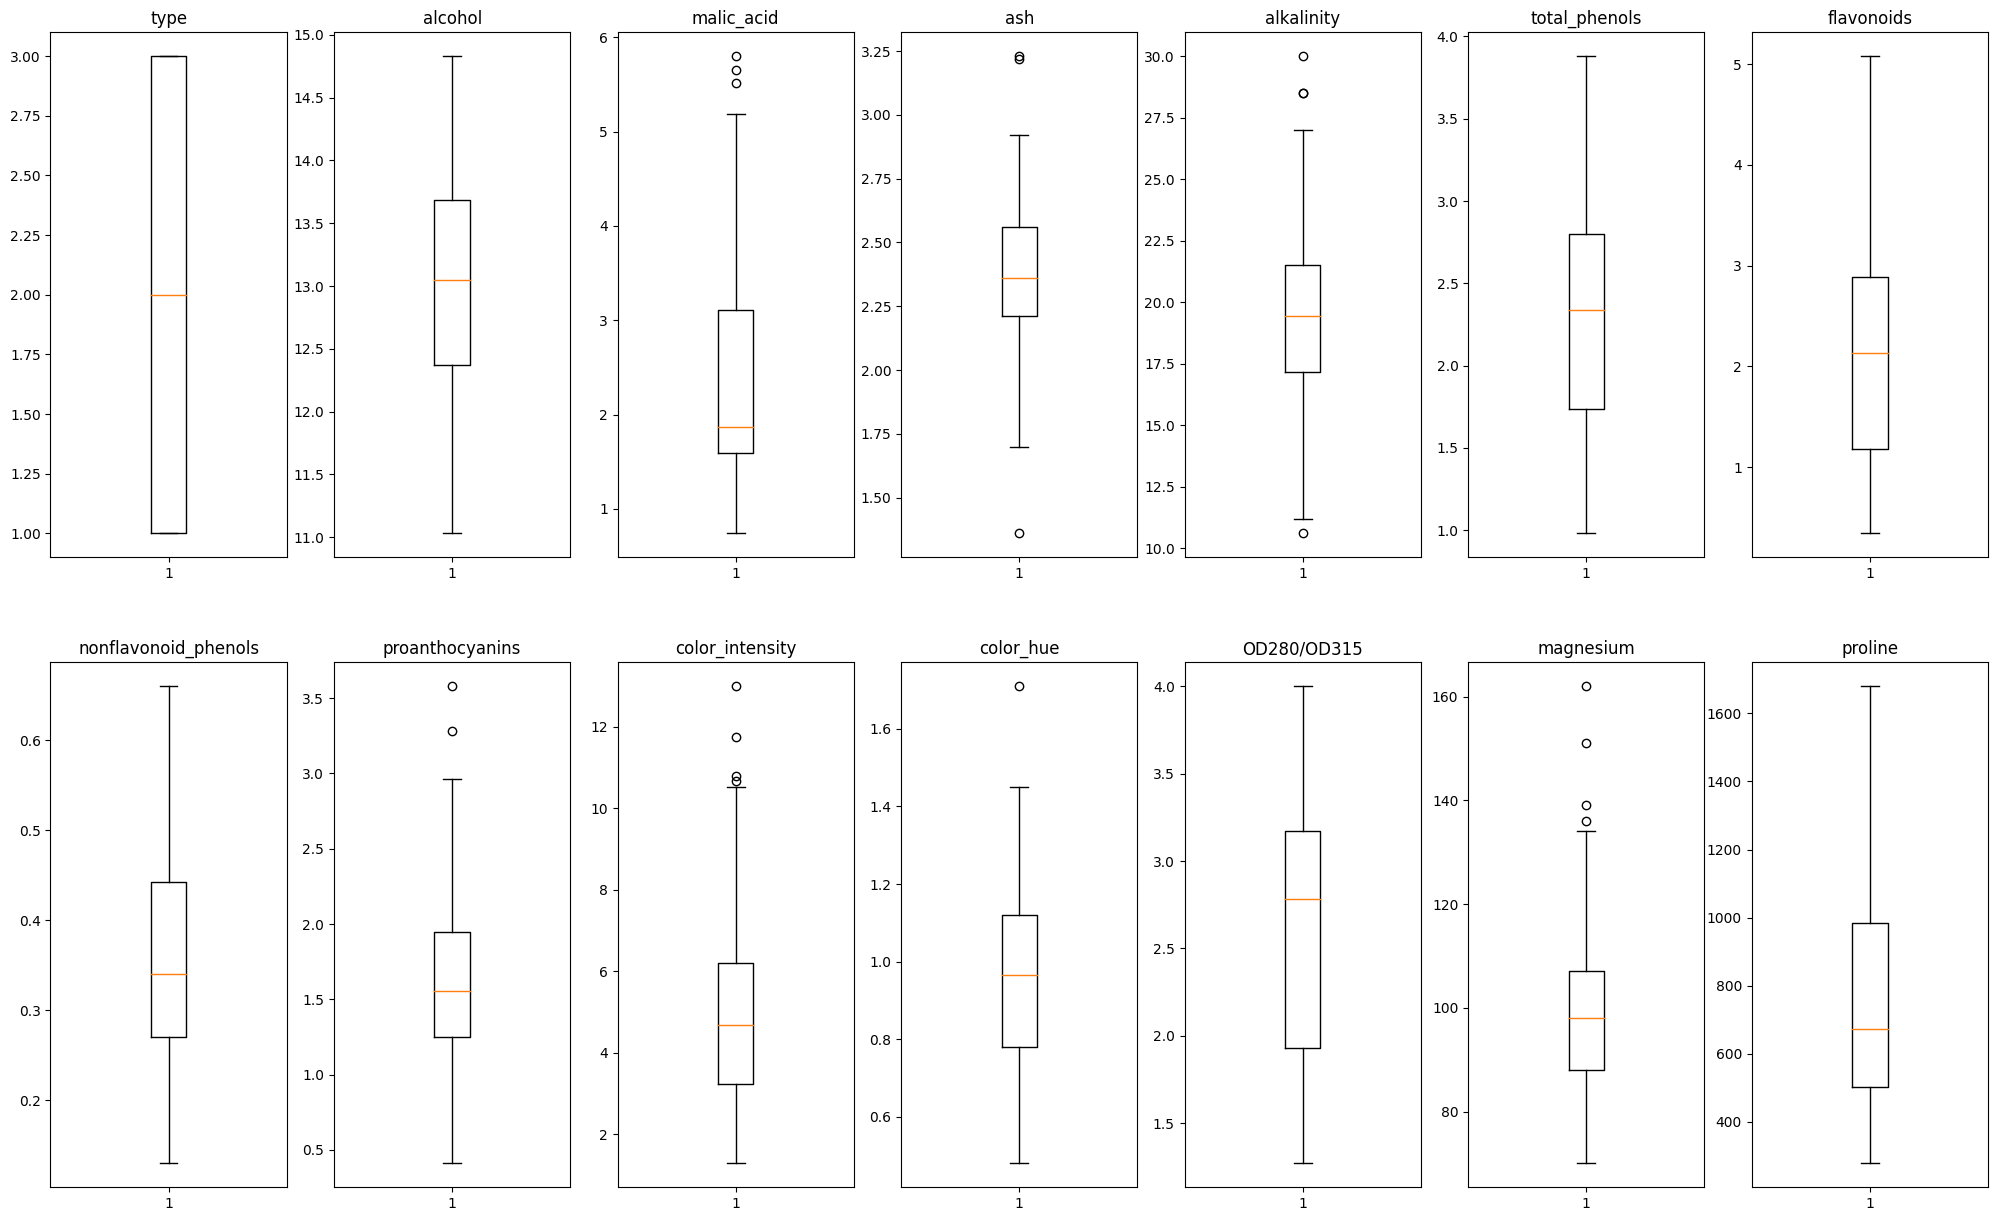

In [99]:
cols = df.columns.to_list()
col_iter = iter(cols)
#plot
fig, ax = plt.subplots( nrows=2, ncols=7, figsize=(25,15) )

for r in range(2):
    for c in range(7):
        column_name = next(col_iter)
        data = df[column_name]
        ax[r][c].boxplot(data)
        ax[r][c].set_title(column_name)
plt.show()

### Scatter Plot

<div class="alert alert-block alert-success">
    
Teken een scatterplot die de ``color_hue`` uitzet tegenover de ``color_intensity``. Gebruik per wijnras (``type``) een andere kleur om de markers te tekenen. Wat is het verband tussen deze drie variabelen?

**TIP:** Gebruik hiervoor het ``hue`` attribuut van de ``pairplot`` functie uit Seaborn, of een ``groupby`` operatie uit Pandas voor een MatPlotLib-grafiek.

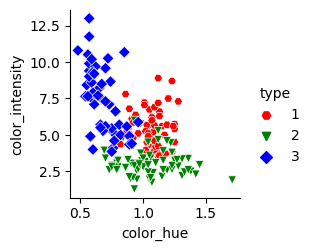

In [100]:
#using seaborn
sns.pairplot(
    df,                                 #data
    hue="type",                         # variable to use for color encoding
    palette = ["red", "green", "blue"],
    x_vars="color_hue", 
    y_vars="color_intensity", 
    kind="scatter",
    markers=["H", "v", "D"]
)

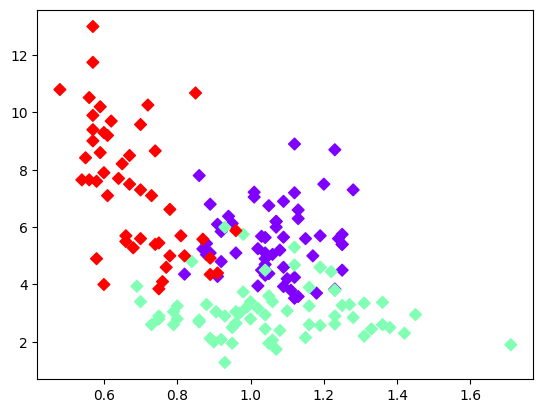

In [101]:
#using matplotlib:
fig, ax = plt.subplots()
ax.scatter(
    df["color_hue"], #x
    df["color_intensity"], #y 
    c = pd.Categorical(df["type"]).codes, #category for color mapping
    cmap="rainbow", #color map
    marker="D"
)
plt.show()

### Correlation Plot

<div class="alert alert-block alert-success">
Teken een Pearson-correlatieplot van de dataset (zonder ``type``). Welke variabelen zijn het sterkst met elkaar gecorreleerd? Welke het minst? Kan je op basis van deze plot afleiden welke soort fenolen dominant zijn in wijn: flavonoïdische of niet-flavonoïdische?

**Tip:** Bereken eerst de correlatie-matrix met Pandas, en teken die vervolgens met een ``heatmap`` uit Seaborn.

Je kan afleiden dat flavonoidische fenolen dominant zijn omdat de correlatie met total_phenols bijna 1 is.


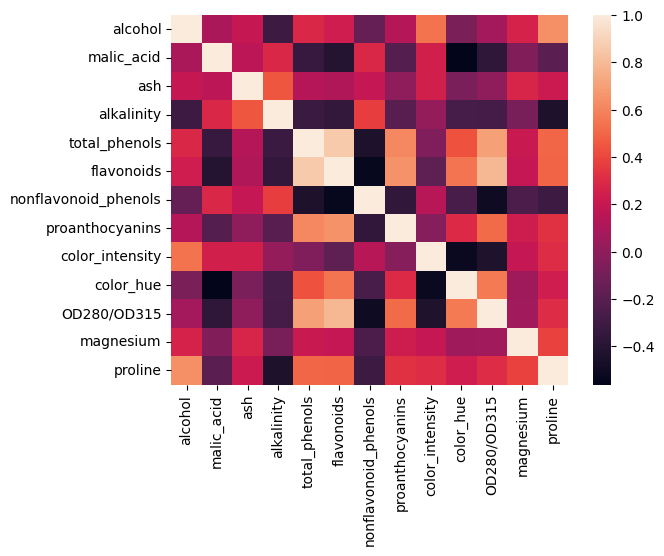

In [102]:
corr_df = df.drop("type", axis=1)
corr = corr_df.corr(method="pearson")
sns.heatmap(corr)
print("Je kan afleiden dat flavonoidische fenolen dominant zijn omdat de correlatie met total_phenols bijna 1 is.")

### Distribution Plot

<div class="alert alert-block alert-success">
    
Plot een bivariate [*Kernel Density Estimation*](https://en.wikipedia.org/wiki/Multivariate_kernel_density_estimation) tussen ``alkalinity`` en ``proline`` voor elk ``type``.

**Tip**: Gebruik hiervoor ``jointplot`` uit Seaborn.

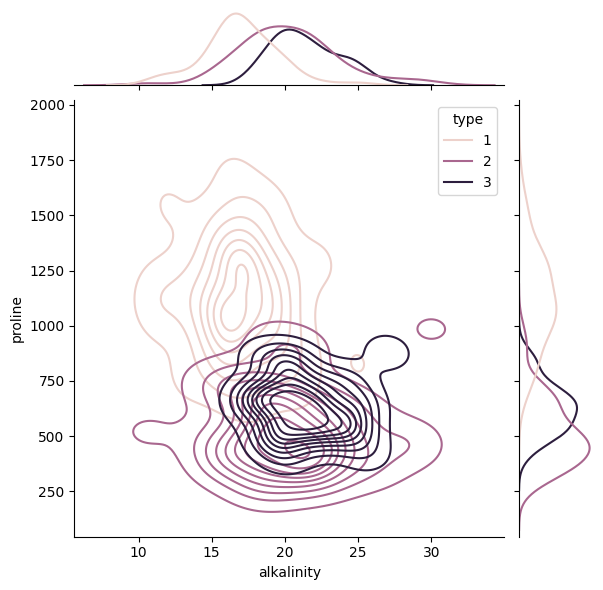

In [103]:
sns.jointplot(
    data = df, 
    x = "alkalinity",
    y = "proline",
    hue = "type",
    kind="kde" #kernel density estimation
)

## Modelling

In deze stap gaan we een aantal *machine learning* technieken bekijken waarmee we de dataset via een statistisch model met een zo laag mogelijke foutenmarge kunnen voorstellen. Deze modellen bevatten een verzameling aan *model parameters* die via een bepaald algoritme zo gefinetuned worden dat ze een combinatie van *inputs* (de features) in een *output* (de *target*) kunnen transformeren, en dat op een zo correct mogelijke manier.

De algoritmes zelf worden geïnitialiseerd via een reeks *hyperparameters*, die juist gekozen moeten worden om een hoge *model accuracy* te bekomen. Het tweaken van deze parameters is vaak een tijdrovend en delicaat proces. Een té goede keuze kan immers zorgen voor een goede *accuracy* op de data waarmee de training werd uitgevoerd, maar zorgt voor een zware terugval bij testen op het voor het model onbekende data. In zo'n geval is er sprake van *overfitting*.

[Scikit-learn](http://scikit-learn.org/stable/user_guide.html) (``sklearn``) is de populairste toolkit om aan *machine learning* te doen in Python. Deze library is enorm uitgebreid, en het uitproberen van alle functionaliteiten zou zeker te veel tijd kosten in dit labo. Bij de oefeningen staat er dan ook een directe verwijzing naar de juiste subpackage(s), zodat er weinig tijd wordt verloren met het doorlezen van de hele *user guide*.



### Tutorial: Dimensionality Reduction

Aangezien de dataset 13 verschillende features bevat, is het nogal moeilijk om deze allemaal tegelijk voor te stellen in één en dezelfde grafiek. Bij wijze van kennismaking met de Scikit-learn API gaan we de dimensies van de dataset reduceren van 13 naar 2, met een zo klein mogelijk verlies aan informatie. 

De techniek die we hiervoor gebruiken heet [*Principle Component Analysis*](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). Principieel is dit een lineaire projectie van de datapunten op een orthogonale ruimte met een lagere dimensie *n*. De assen van deze ruimte komen overeen met de eigenvectoren van de covariantie-matrix van de oorspronkelijke dataset die horen bij de *n* grootste eigenwaarden.

**Let op:** Vanaf nu gebruiken we de variabele ``df_wine`` uit [1.2.4](#Wrapping-into-Pandas-ML) voor de analyse!

In onderstaand voorbeeld worden zowel de pure Scikit-learn API als de wrapper-API van Pandas-ML voorgesteld. Aangezien onze data in ``DataFrame``-formaat bestaat en we de resultaten hiermee graag compatibel zouden zien, wordt al snel duidelijk dat de tweede aanpak heel wat eenvoudiger werkt. Wel is er van de eerstgenoemde API veel meer documentatie beschikbaar.

De keuze tussen het gebruik van pure Scikit-learn en Pandas-ML staat volledig vrij.

#### Pure Scikit-learn API

In [104]:
from sklearn.decomposition import PCA              ## import

pca = PCA(n_components=2)                          ## instantiation
pca.fit(df_wine.data)                              ## fit the PCA model with the data (excluding the target!!!)
df_wine_transformed_np = pca.transform(df_wine.data)  ## transform the data with the fitted PCA model
                                                   ## note: the two previous steps can be combined 
                                                   ## with fit_transform

df_wine_transformed_np[:5]                            ## results are in np.ndarray format
df_wine.head()

type  alcohol  malic_acid   ash  alkalinity  total_phenols  flavonoids  \
0     1    14.23        1.71  2.43        15.6           2.80        3.06   
1     1    13.20        1.78  2.14        11.2           2.65        2.76   
2     1    13.16        2.36  2.67        18.6           2.80        3.24   
3     1    14.37        1.95  2.50        16.8           3.85        3.49   
4     1    13.24        2.59  2.87        21.0           2.80        2.69   

   nonflavonoid_phenols  proanthocyanins  color_intensity  color_hue  \
0                  0.28             2.29             5.64       1.04   
1                  0.26             1.28             4.38       1.05   
2                  0.30             2.81             5.68       1.03   
3                  0.24             2.18             7.80       0.86   
4                  0.39             1.82             4.32       1.04   

   OD280/OD315  magnesium  proline  
0         3.92        127     1065  
1         3.40        100     1050  
2         3.17        101     1185  
3         3.45        113     1480  
4         2.93        118      735

#### Using Pandas-ML

In [105]:
pca = df_wine.decomposition.PCA(n_components=2)  ## import and instantiation
df_wine_transformed = df_wine.fit_transform(pca) ## fit and transform the data

df_wine_transformed.head()                       ## results are in DataFrame format

type           0          1
0     1  318.789797  21.620862
1     1  303.334274  -5.236081
2     1  438.297693  -6.370896
3     1  733.474251   0.465474
4     1  -11.343794  18.495342

<div class="alert alert-block alert-success">
    
Teken een scatterplot voor de *components* zoals eerder, maar nu voor `df_wine_transformed`.

**Vraag**: Kan op basis van deze gereduceerde features nog een duidelijk onderscheid tussen de klassen gemaakt worden?

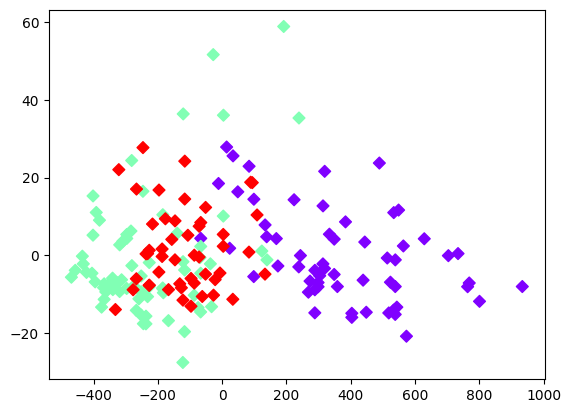

In [106]:
#using pure scikit api:
fig, ax = plt.subplots()
ax.scatter(
    df_wine_transformed_np.T[0], #x
    df_wine_transformed_np.T[1], #y 
    c = df_wine.target, #category for color mapping
    cmap="rainbow", #color map
    marker="D"
)
plt.show()

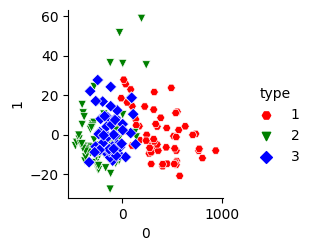

In [107]:
#scatter plot with seaborn (this works when using pandas-ML)
sns.pairplot(
    df_wine_transformed, #data
    hue="type", # variable to use for color encoding
    palette = ["red", "green", "blue"],
    x_vars=0, 
    y_vars=1, 
    kind="scatter",
    markers=["H", "v", "D"]
)

In [108]:
print("Er kan zeker nog een onderscheid gemaakt worden tussen de klassen. De 'principle components' vatten de",
"vele dimensies van daarvoor goed samen net zodat er nog goed onderscheid gemaakt kan worden.", 
"Op de scatter plots zien we dat de types duidelijk verschillende regios innemen met beperkte overlap.")

Er kan zeker nog een onderscheid gemaakt worden tussen de klassen. De 'principle components' vatten de vele dimensies van daarvoor goed samen net zodat er nog goed onderscheid gemaakt kan worden. Op de scatter plots zien we dat de types duidelijk verschillende regios innemen met beperkte overlap.


### Tutorial 2: Feature Scaling

Zoals beloofd in hoofdstuk [1.2.3](http://localhost:8888/notebooks/labo1.ipynb#Scaling) wordt de hele dataset eerst nog gescaled voor we er modellen mee gaan trainen. Hiervoor gebruiken we de ``MinMaxScaler`` uit [``sklearn.preprocessing``](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing). De werking hiervan gebeurt op bijna exact dezelfde manier als in de formule uit 1.2.3. 

In [109]:
print("Before scaling")
df_wine.head()

Before scaling


type  alcohol  malic_acid   ash  alkalinity  total_phenols  flavonoids  \
0     1    14.23        1.71  2.43        15.6           2.80        3.06   
1     1    13.20        1.78  2.14        11.2           2.65        2.76   
2     1    13.16        2.36  2.67        18.6           2.80        3.24   
3     1    14.37        1.95  2.50        16.8           3.85        3.49   
4     1    13.24        2.59  2.87        21.0           2.80        2.69   

   nonflavonoid_phenols  proanthocyanins  color_intensity  color_hue  \
0                  0.28             2.29             5.64       1.04   
1                  0.26             1.28             4.38       1.05   
2                  0.30             2.81             5.68       1.03   
3                  0.24             2.18             7.80       0.86   
4                  0.39             1.82             4.32       1.04   

   OD280/OD315  magnesium  proline  
0         3.92        127     1065  
1         3.40        100     1050  
2         3.17        101     1185  
3         3.45        113     1480  
4         2.93        118      735

In [110]:
#In this cell we are scaling the data in the dataframe df_wine (except the target column "type") 
from sklearn.preprocessing import MinMaxScaler
#create scaler object
scaler = MinMaxScaler( feature_range=(0, 1) , copy=False) 

#select all columns except type to scale with the MinMaxScaler
columns_to_scale = [label for label in df_wine.columns.tolist()]
columns_to_scale.remove("type")
print(f"These columns will be scaled:{columns_to_scale}")

#make a copy
df_wine_scaled = df_wine.copy()
#fit transfrom and scale the columns_to_scale to be between [0,1]
df_wine_scaled[columns_to_scale] = scaler.fit_transform(df_wine[columns_to_scale])
#display the result
df_wine_scaled.head()

These columns will be scaled:['alcohol', 'malic_acid', 'ash', 'alkalinity', 'total_phenols', 'flavonoids', 'nonflavonoid_phenols', 'proanthocyanins', 'color_intensity', 'color_hue', 'OD280/OD315', 'magnesium', 'proline']


/home/pieterdn/Documents/Gitlab/labo-ml/venv/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


type   alcohol  malic_acid       ash  alkalinity  total_phenols  \
0     1  0.842105    0.191700  0.572193    0.257732       0.627586   
1     1  0.571053    0.205534  0.417112    0.030928       0.575862   
2     1  0.560526    0.320158  0.700535    0.412371       0.627586   
3     1  0.878947    0.239130  0.609626    0.319588       0.989655   
4     1  0.581579    0.365613  0.807487    0.536082       0.627586   

   flavonoids  nonflavonoid_phenols  proanthocyanins  color_intensity  \
0    0.573840              0.283019         0.593060         0.372014   
1    0.510549              0.245283         0.274448         0.264505   
2    0.611814              0.320755         0.757098         0.375427   
3    0.664557              0.207547         0.558360         0.556314   
4    0.495781              0.490566         0.444795         0.259386   

   color_hue  OD280/OD315  magnesium   proline  
0   0.455285     0.970696   0.619565  0.561341  
1   0.463415     0.780220   0.326087  0.550642  
2   0.447154     0.695971   0.336957  0.646933  
3   0.308943     0.798535   0.467391  0.857347  
4   0.455285     0.608059   0.521739  0.325963

<div class="alert alert-block alert-success">
    
Bereken de PCA van daarnet opnieuw, en teken ook de scatterplot hiervan. Is de conclusie uit de vorige opgave nog steeds geldig?

In [111]:
pca = df_wine_scaled.decomposition.PCA(n_components=2)  ## import and instantiation
df_wine_transformed = df_wine_scaled.fit_transform(pca) ## fit and transform the data

df_wine_transformed.head()                       ## results are in DataFrame format

type         0         1
0     1 -0.706211 -0.256991
1     1 -0.488571 -0.015405
2     1 -0.521042 -0.190567
3     1 -0.818549 -0.588004
4     1 -0.203835 -0.056826

### Train-Test Split

Zoals reeds aangehaald in de inleiding van dit hoofdstuk mogen we niet de hele dataset gebruiken om *machine learning models* te trainen wegens gevaar op *overfitting*. Via de ``train_test_split`` methode uit [``sklearn.model_selection``](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) kunnen we een deel van onze data afzonderen en pas later opnieuw gebruiken als testset wanneer we denken dat het model af is.

<div class="alert alert-block alert-success">
    
Splits de dataset op in twee delen met random geselecteerde datapunten: ``train_wine`` en ``test_wine``. De trainingset moet 70% van de originele data bevatten, de testset de overige 30%.

In [112]:
#In the following cells I will use the pure scikit API, meaning data and labels (targets) will be numpy arrays
#our data looks like this:
data = df_wine_transformed.data.values #the 2 principle components
labels = df_wine_transformed.target.values #wine type
print(f"data size: {data.shape} labels size: {labels.shape}")
print(f"dtype data {type(data)} dtype labels {type(labels)}")
print(f"data\n{data[:5]} \n\nlabels \n{labels[:5]}")

data size: (176, 2) labels size: (176,)
dtype data <class 'numpy.ndarray'> dtype labels <class 'numpy.ndarray'>
data
[[-0.70621051 -0.25699076]
 [-0.48857108 -0.01540494]
 [-0.52104248 -0.1905667 ]
 [-0.81854873 -0.58800355]
 [-0.20383462 -0.05682606]] 

labels 
[1 1 1 1 1]


In [113]:
#Now we are going to use the principle components as a predictor for the target "type"
#First let's split them up in a training and a testing set
from sklearn.model_selection import train_test_split
train_wine, test_wine, train_labels, test_labels= train_test_split(
    data, 
    labels,  
    test_size=0.3, #30% test set, 70% train set
    random_state=0 #for reproducable results of the random shuffling
)

In [114]:
#our training set looks like this
print(f"train_wine\n{train_wine[:5]} \n\ntrain_labels \n{train_labels[:5]}")

train_wine
[[ 0.26149471 -0.64001429]
 [-0.60259233 -0.002998  ]
 [-0.36807868  0.39130173]
 [ 0.51669858 -0.22301106]
 [ 0.05609399  0.43350809]] 

train_labels 
[3 1 2 3 2]


In [115]:
#our test set looks like this
print(f"test_wine\n{test_wine[:5]} \n\ntest_labels \n{test_labels[:5]}")

test_wine
[[-0.47244835 -0.22114821]
 [ 0.55206218 -0.32721676]
 [ 0.17916358  0.43581231]
 [-0.58051816 -0.30097704]
 [-0.28072957  0.34921391]] 

test_labels 
[1 3 2 1 2]


In [116]:
#Proportion of training data
prop_train = (len(train_wine)/(len(test_wine) + len(train_wine)) ) * 100
#Proportion of testing data
prop_test = 100 - prop_train
print(f"Size of the training set {len(train_wine)}\nThe training set contains {prop_train}% of the data\n")
print(f"Size of the test set {len(test_wine)}\nThe test set contains {prop_test}% of the data")

Size of the training set 123
The training set contains 69.88636363636364% of the data

Size of the test set 53
The test set contains 30.11363636363636% of the data


### Decision Tree

Het eerste algoritme dat we zullen bekijken is de *decision tree* uit [``sklearn.tree``](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree). In zo'n model wordt stelselmatig een boomstructuur opgesteld waar in elke *node* de data opgesplitst wordt op basis van de waarde van één van de features. De trainingsmethode probeert deze *splits* zodanig te optimaliseren dat de *leafs* enkel datapunten van één bepaalde klasse bevatten.

Bij deze methode is het aantal te leren parameters niet op voorhand vastgelegd, aangezien dit afhangt van de grootte en complexiteit van de dataset. Paradoxaal genoeg worden zulke algoritmes *niet-parametrisch* genoemd, ook al kunnen ze soms veel meer parameters bevatten dan *parametrische* algoritmes.

<div class="alert alert-block alert-success">
    
Genereer een decision tree classifier op basis van ``train_wine`` die de data classificeert volgens wijntype. Noem het resultaat ``clf_tree``. Teken deze vervolgens met ``graphviz`` (zie User Guide).

In [117]:
# genereer
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(random_state=0)
clf_tree.fit(train_wine, train_labels) # Build a decision tree classifier from the training set

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [119]:
# teken
import graphviz
from sklearn.tree import export_graphviz
display(graphviz.Source(export_graphviz(clf_tree)))

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

<div class="alert alert-block alert-success">
    
**Vraag:** Voer de training van de decision tree opnieuw uit, maar vervang ``train_wine`` telkens door ``train_wine.inverse_transform(scaler)`` (de originele, niet-gescalede waarden). Teken ook de boom opnieuw.
Wat valt op? Welke van de twee bomen zou je het liefst gebruiken als classifier?

In [118]:
#make a copy of the unscaled dataframe
df_wine_unscaled = df_wine.copy()

In [ ]:
#apply the principal component analysis again to compress to 2 dimensions
pca = df_wine_unscaled.decomposition.PCA(n_components=2)    ## import and instantiation
df_wine_transformed2 = df_wine_unscaled.fit_transform(pca)  ## fit and transform the data

df_wine_transformed2.head()                       ## results are in DataFrame format

type           0          1
0     1  318.789797  21.620862
1     1  303.334274  -5.236081
2     1  438.297693  -6.370896
3     1  733.474251   0.465474
4     1  -11.343794  18.495342

In [ ]:
#extract data as np arrays
data2 = df_wine_transformed2.data.values
labels2 = df_wine_transformed2["type"].values

In [ ]:
#create training and testing set
train_wine2, test_wine2, train_labels2, test_labels2= train_test_split(
    data2, 
    labels2,  
    test_size=0.3, #30% test set, 70% train set
    random_state=0 #for reproducable results of the random shuffling
)

In [ ]:
#generate decision tree
clf_tree2 = DecisionTreeClassifier(random_state=0)
clf_tree2.fit(train_wine2, train_labels2) # Build a decision tree classifier from the training set

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

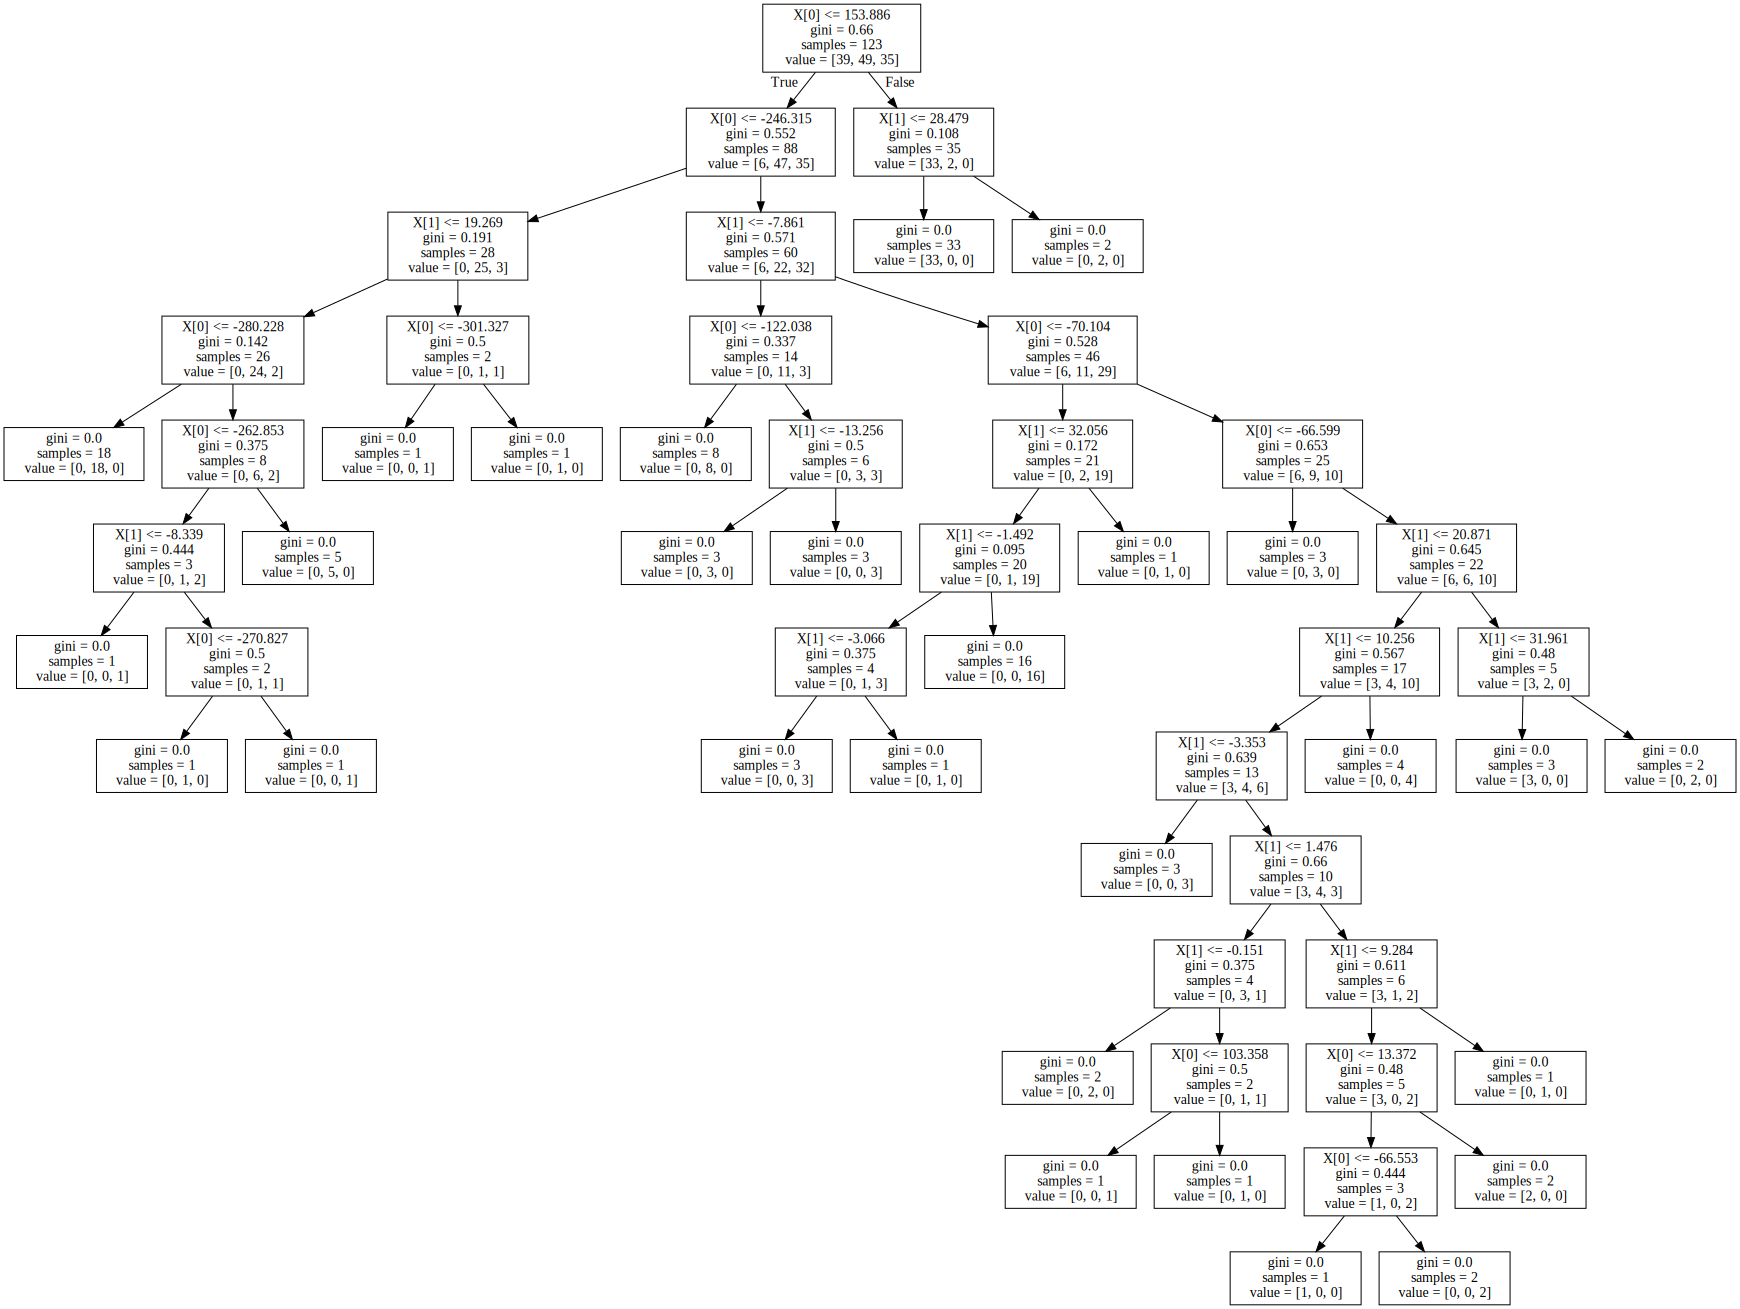

In [ ]:
#visualize tree
display(graphviz.Source(export_graphviz(clf_tree2)))

In [ ]:
print("Het valt op dat deze boom veel groter is met meer nodes. Ik zou liever de eerste gebruiken als classifier.")

Het valt op dat deze boom veel groter is met meer nodes. Ik zou liever de eerste gebruiken als classifier.


### Support Vector Machine

De Support Vector Machine (SVM) uit [``sklearn.svm``](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm) is het tweede algoritme dat we gaan bekijken. Een SVM construeert een [*hyperplane*](https://en.wikipedia.org/wiki/Hyperplane) dat de klassen van elkaar scheidt. De kracht van de SVM zit in het optimalisatiemechanisme, waarbij de *margin*, de afstand tussen het hyperplane en het dichtsbijliggende datapunt van elke klasse, gemaximaliseerd wordt. In het geval dat er meer dan twee klassen zijn, wordt er voor elke twee klassen een aparte SVM getraind (in totaal ``n * (n-1) / 2`` modellen); voor het eindresultaat worden de scores hiervan gecombineerd.

<div class="alert alert-block alert-success">
    
Genereer een SVM op basis van ``train_wine`` die de data classificeert volgens wijntype. Noem het resultaat ``clf_svm``.

In [ ]:
from sklearn import svm
clf_svm = svm.SVC(gamma="scale")
clf_svm.fit(train_wine, train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Multilayer Perceptron

De laatste classifier die onderzocht wordt komt uit de familie van *neurale netwerken*. Het Multilayer Perceptron (MLP) is een netwerk dat bestaat uit een *input layer* en een *output layer*, met daartussen een aantal *hidden layers* die elk een aantal *nodes* bevatten. In elke *node* worden de waarden uit alle nodes van de vorige layer samen met een *bias* lineair gecombineerd en vervolgens door een niet-lineaire *activatiefunctie* gehaald. Door de parameters van deze lineaire combinaties te trainen op de dataset, kan dit netwerk een niet-lineaire functie vormen die de dataset-mapping van features naar target heel dicht benadert. Een nadeel van deze techniek is wel dat er relatief veel trainingsdata moet zijn om tot een acceptabel resultaat te komen.

<img src="http://scikit-learn.org/stable/_images/multilayerperceptron_network.png" alt="MLP Structure" width=300/>

De [``sklearn.neural_network``](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neural_network) module bevat enkele klassen om met MLPs te werken. 

<div class="alert alert-block alert-success">
    
Creëer een multilayer perceptron op basis van ``train_wine`` die de data classificeert volgens wijntype. Noem het resultaat ``clf_mlp``. Gebruik ``'lbfgs'`` en zet het maximum aantal trainingsiteraties op 20000. Maak gebruik van de volgende structuur voor de hidden layers:
* hidden layer 1: 20 nodes
* hidden layer 2: 15 nodes
* hidden layer 3: 10 nodes
* hidden layer 4: 5 nodes

In [120]:
#create classifier
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(
    hidden_layer_sizes=(20, 15, 10, 5),
    solver='lbfgs',
    max_iter=20_000
)

In [121]:
#fit
clf_mlp.fit(train_wine, train_labels)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 15, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=20000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

<div class="alert alert-block alert-success">
    
**Vraag:** Wat is het totaal aantal *weights* of parameters dat door dit netwerk getraind moet worden (exclusief biases)?

In [122]:
n_params = 2*20*15*10*5+5 #2 input neurons, hidden layers, one output (5 to one connections at the end)
print(f"Aantal weights is {n_params}")

Aantal weights is 30005


## Cross-Validation

Nu we onze modellen gedefinieerd hebben, willen we uiteraard ook graag weten hoe goed ze presteren voordat we ze uiteindelijk loslaten op onze échte testdata. Er is echter een groot probleem: we hebben geen extra data meer over om deze tussentijdse test uit te voeren! We hadden deze uiteraard eerder kunnen afsplitsen van de trainingset, maar dan zou die laatste voor de algoritmes wel héél klein geworden zijn om performante modellen te genereren.

De oplossing vinden we onder de vorm van *cross validation*. Bij deze techniek wordt de trainingsset niet één, maar meerdere keren opgesplitst in een (kleinere) training- en validatieset. Bij elk van deze splitsingen wordt de *accuracy score* van het model berekend, en het gemiddelde van deze scores vormt dan de *cross validation score*. Deze score blijkt in de meeste gevallen vrij representatief te zijn voor de uiteindelijke performance op de testset, en door het gebruik van de splitsingen is er geen extra data nodig om testen te doen.

In [``sklearn.model_selection``](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) vinden we de ``cross_val_score`` functie terug, samen met een aantal *splitters*. 

<div class="alert alert-block alert-success">
    
* Maak een ``ShuffleSplit`` object aan met 10 splits.
* Bereken de *cross validation score* voor de drie modellen, gebruikmakend van die ``ShuffleSplit``.

**Vraag**: Welk model presteert het best?

In [123]:
print(f"The data we are working with \n{data[:5]}\n")
print(f"The labels (wine types): \n{labels[:5]}")

The data we are working with 
[[-0.70621051 -0.25699076]
 [-0.48857108 -0.01540494]
 [-0.52104248 -0.1905667 ]
 [-0.81854873 -0.58800355]
 [-0.20383462 -0.05682606]]

The labels (wine types): 
[1 1 1 1 1]


In [124]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
# ShuffleSplit

ss = ShuffleSplit(n_splits=10, test_size=0.30,random_state=0)
cv = ss.split(X=train_wine, y=train_labels)

# cross_val_score

#### Decision tree ####
scores = cross_val_score(
    clf_tree, #the estimator/classifier
    train_wine,
    y=train_labels,
    cv=cv #generator for array indicis in data that select a certain split out of "data"
)
accuracy = scores.mean()
std = scores.std()
print(f"Decision tree classifier:\nAccuracy: {accuracy} \nstd_dev: {std}\n")
#restart generator
cv = ss.split(X=train_wine, y=train_labels)

#### Support Vector Machine ####
scores = cross_val_score(
    clf_svm, #the estimator/classifier
    train_wine,
    y=train_labels,
    cv=cv #generator for array indicis in data that select a certain split out of "data"
)
accuracy = scores.mean()
std = scores.std()
print(f"SVM classifier:\nAccuracy: {accuracy} \nstd_dev: {std}\n")
#restart generator
cv = ss.split(X=train_wine, y=train_labels)

#### Multi Layer Perceptron ####
scores = cross_val_score(
    clf_mlp, #the estimator/classifier
    train_wine,
    y=train_labels,
    cv=cv #generator for array indicis in data that select a certain split out of "data"
)
accuracy = scores.mean()
std = scores.std()
print(f"MLP classifier:\nAccuracy: {accuracy} \nstd_dev: {std}\n")
train_wine

Decision tree classifier:
Accuracy: 0.9324324324324322 
std_dev: 0.027694461529620545

SVM classifier:
Accuracy: 0.9702702702702704 
std_dev: 0.030696801869190674

MLP classifier:
Accuracy: 0.9351351351351351 
std_dev: 0.05821799791496761



array([[ 0.26149471, -0.64001429],
       [-0.60259233, -0.002998  ],
       [-0.36807868,  0.39130173],
       [ 0.51669858, -0.22301106],
       [ 0.05609399,  0.43350809],
       [ 0.0716966 ,  0.19899297],
       [ 0.57785728, -0.13306434],
       [-0.07113194,  0.77903267],
       [-0.28590862, -0.09332486],
       [ 0.50742474,  0.17327935],
       [ 0.55580756,  0.04803403],
       [-0.21019894,  0.44301088],
       [ 0.62949934, -0.53968341],
       [ 0.04311541,  0.56428276],
       [-0.45902222,  0.35371686],
       [-0.52104248, -0.1905667 ],
       [ 0.40466284,  0.24043928],
       [-0.3995865 ,  0.06735573],
       [ 0.13025818,  0.24023165],
       [-0.11356868, -0.06950724],
       [-0.72629985, -0.36164218],
       [-0.21217109,  0.38394746],
       [-0.46320818,  0.27403092],
       [ 0.77345709, -0.17554855],
       [-0.00454031,  0.38356111],
       [ 0.5789527 , -0.15209138],
       [ 0.31547459,  0.42010351],
       [ 0.56667152,  0.01306198],
       [ 0.67619268,

In [ ]:
print("De SVM presteert het beste.")

De SVM presteert het beste.


## Prediction and Performance

*Finally, the big moment has arrived!* Het is tijd om de testdata erbij te halen en te kijken hoe goed (of hoe slecht) onze modellen het doen op onbekende data. [``sklearn.metrics``](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) bevat een groot aantal methodes om de *performance* van een model numeriek of grafisch voor te stellen.

<div class="alert alert-block alert-success">
    
Doe de volgende stappen voor elk van de drie modellen (hier ``clf`` genoemd):
1. Hertrain ``clf`` op de volledige trainingset (``train_wine``).
2. Ken ``clf`` toe aan het ``estimator`` attribuut van ``test_wine`` (enkel van toepassing bij gebruik van Pandas-ML API).
3. Bereken de ``accuracy_score`` op ``test_wine`` met de hertrainde ``clf``.
4. Print of teken de *confusion matrix* van ``test_wine``.

**Question:** Welke classifier presteert het beste op de testset? Komt dit overeen met de bevindingen uit de cross-validatiescores? Waardoor zou een mismatch tussen *accuracy score* en *cross validation score* kunnen onstaan?

In [ ]:
from sklearn.metrics import confusion_matrix
#Decision tree classifier
clf_tree.fit(train_wine, train_labels) #retrain
accuracy = clf_tree.score(test_wine, test_labels) #calc acc score on testing set
print(f"Accuracy Decision tree classifier {accuracy}")
#Ground truth
y_true = test_labels.copy()
#Predictions made by clf_tree
y_pred = clf_tree.predict(test_wine)

#compute confusion matrix
conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)
#predicted class is the column nr, ground truth is the row nr
#correct classifications can be found on the diagonal
print(conf_mat)  

Accuracy Decision tree classifier 0.9622641509433962
[[18  1  0]
 [ 1 20  0]
 [ 0  0 13]]


In [ ]:
#Support vector machine
clf_svm.fit(train_wine, train_labels) #retrain
accuracy = clf_svm.score(test_wine, test_labels) #calc acc score on testing set
print(f"Accuracy Support Vector Machine {accuracy}")
#Ground truth
y_true = test_labels.copy()
#Predictions made by clf_tree
y_pred = clf_svm.predict(test_wine)

#compute confusion matrix
conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)
#predicted class is the column nr, ground truth is the row nr
#correct classifications can be found on the diagonal
print(conf_mat) 

Accuracy Support Vector Machine 1.0
[[19  0  0]
 [ 0 21  0]
 [ 0  0 13]]


In [ ]:
#Multi Layer Perceptron
clf_mlp.fit(train_wine, train_labels) #retrain
accuracy = clf_mlp.score(test_wine, test_labels) #calc acc score on testing set
print(f"Accuracy Multi Layer Perceptron {accuracy}")
#Ground truth
y_true = test_labels.copy()
#Predictions made by clf_tree
y_pred = clf_mlp.predict(test_wine)

#compute confusion matrix
conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)
#predicted class is the column nr, ground truth is the row nr
#correct classifications can be found on the diagonal
print(conf_mat) 

Accuracy Multi Layer Perceptron 0.39622641509433965
[[ 0 19  0]
 [ 0 21  0]
 [ 0 13  0]]


In [ ]:
print(f"De svm presteert het beste. De prestaties van de MLP op de test set zijn soms veel slechter dan op \
de trainings set. Deze mismatch is waarschijnlijk het gevolg van overfitting op de trainings set. \
De andere modellen hebben hier minder last van.")

De svm presteert het beste. De prestaties van de MLP op de test set zijn soms veel slechter dan op de trainings set. Deze mismatch is waarschijnlijk het gevolg van overfitting op de trainings set. De andere modellen hebben hier minder last van.
